Train Accuracy: 1.00 ± 0.00
Validation Accuracy: 0.59 ± 0.01
Acurácia no conjunto de teste: 0.60
Matriz de Confusão:
[[   0  115   25    8]
 [   0 2230  133  250]
 [   0  775  187   64]
 [   0  573   21  486]]
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       148
           2       0.60      0.85      0.71      2613
           3       0.51      0.18      0.27      1026
           4       0.60      0.45      0.51      1080

    accuracy                           0.60      4867
   macro avg       0.43      0.37      0.37      4867
weighted avg       0.57      0.60      0.55      4867

Kappa: 0.25
Sensibilidade (Recall): [0.         0.85342518 0.18226121 0.45      ]
Especificidade: [0.         0.85342518 0.18226121 0.45      ]
Precisão (PPV): [0.         0.60384511 0.51092896 0.60148515]
VPN: [0.         0.60384511 0.51092896 0.60148515]
F1 Score: [0.         0.70726292 0.26867816 0.51483051]
Precisão Balan

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

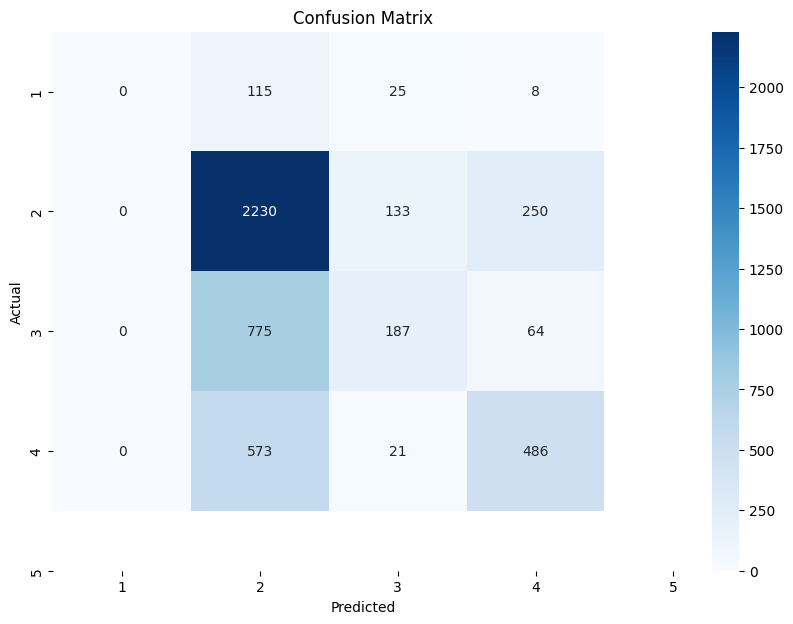

In [8]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, cohen_kappa_score,
                             precision_score, recall_score, f1_score, balanced_accuracy_score)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Carregar o dataset
gnetDf = pd.read_csv("datasets/novo_Dados_Contextuais_Codificados.csv")

features = ['RP_001', 'RP_002', 'RP_003', 'RP_010', 'RP_007', 'RP_008', 'RP_023', 'RP_005', 'RP_006', 
       'RP_009',  'RP_011', 'RP_012', 'RP_013',  'RP_015', 'RP_010', 'RP_018', 'RP_019', 'RP_014',
       'RP_016', 'RP_017',  'RP_020', 'RP_021', 'RP_022',
        'RP_024', 'RP_027', 'RP_028', 'RP_029', 'RP_030',
       'RP_031', 'RP_032', 'RP_033', 'RP_034', 'RP_035', 'RP_036', 'RP_037',
       'RP_038', 'RP_039', 'RP_040', 'RP_025', 'RP_026', 
        'RP_046',    'RP_050', ]

#    'RP_042', 'RP_044', 'RP_045', 'RP_043', 'RP_048' 'RP_047', 'RP_049',

X = gnetDf[features]
y = gnetDf['RP_041']


# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Criar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo com validação cruzada
cv_results = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)

# Exibir os resultados da validação cruzada
print(f"Train Accuracy: {cv_results['train_score'].mean():.2f} ± {cv_results['train_score'].std():.2f}")
print(f"Validation Accuracy: {cv_results['test_score'].mean():.2f} ± {cv_results['test_score'].std():.2f}")

# Treinar o modelo com todos os dados de treino
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir a matriz de confusão
print('Matriz de Confusão:')
print(conf_matrix)

# Calcular e imprimir o relatório de classificação
report = classification_report(y_test, y_pred, target_names=['1', '2', '3','4'])
print('Relatório de Classificação:')
print(report)

# Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f'Kappa: {kappa:.2f}')

# Sensibilidade (Recall), Especificidade, Precisão (PPV), VPN
sensitivity = recall_score(y_test, y_pred, average=None)
specificity = recall_score(y_test, y_pred, pos_label=0, average=None)
precision = precision_score(y_test, y_pred, average=None)
npv = precision_score(y_test, y_pred, pos_label=0, average=None)
f1 = f1_score(y_test, y_pred, average=None)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Sensibilidade (Recall): {sensitivity}')
print(f'Especificidade: {specificity}')
print(f'Precisão (PPV): {precision}')
print(f'VPN: {npv}')
print(f'F1 Score: {f1}')
print(f'Precisão Balanceada: {balanced_accuracy:.2f}')

# Prevalência e Taxa de Detecção
prevalence = np.mean(y_test)
detection_rate = sensitivity.mean()
print(f'Prevalência: {prevalence:.2f}')
print(f'Taxa de Detecção: {detection_rate:.2f}')

# Intervalo de Confiança para Acurácia
n = len(y_test)
se = np.sqrt((accuracy * (1 - accuracy)) / n)
confidence_interval = stats.norm.interval(0.95, loc=accuracy, scale=se)
print(f'Intervalo de Confiança (95%): {confidence_interval}')

# Visualizar a matriz de confusão usando seaborn
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Train Accuracy: 1.00 ± 0.00
Validation Accuracy: 0.66 ± 0.01
Acurácia no conjunto de teste: 0.66
Matriz de Confusão:
[[   0   25    0    6]
 [   0 2349    1  453]
 [   0  296    2   43]
 [   0  832    0  860]]
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        31
           2       0.67      0.84      0.75      2803
           3       0.67      0.01      0.01       341
           4       0.63      0.51      0.56      1692

    accuracy                           0.66      4867
   macro avg       0.49      0.34      0.33      4867
weighted avg       0.65      0.66      0.63      4867

Kappa: 0.30
Sensibilidade (Recall): [0.         0.83803068 0.0058651  0.50827423]
Especificidade: [0.         0.83803068 0.0058651  0.50827423]
Precisão (PPV): [0.         0.67075957 0.66666667 0.63142438]
VPN: [0.         0.67075957 0.66666667 0.63142438]
F1 Score: [0.         0.74512292 0.01162791 0.56319581]
Precisão Balan

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

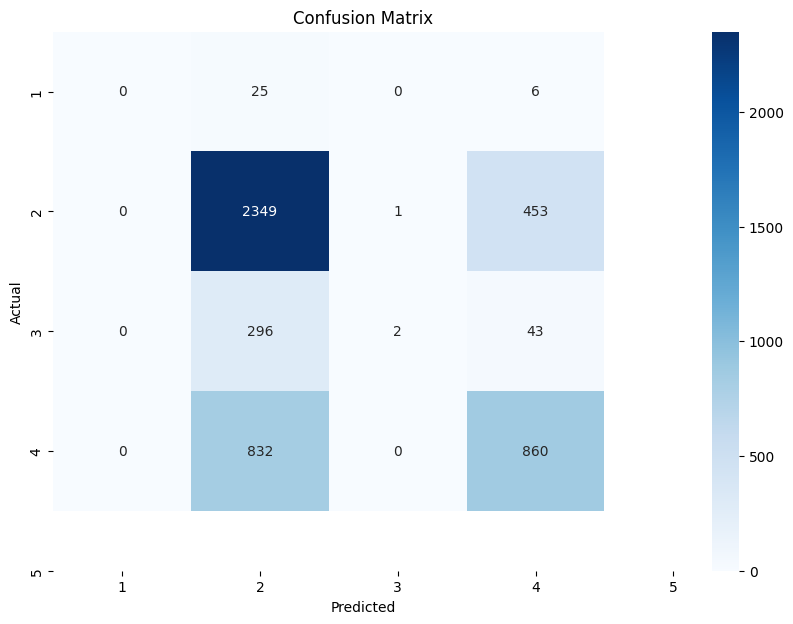

In [4]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, cohen_kappa_score,
                             precision_score, recall_score, f1_score, balanced_accuracy_score)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Carregar o dataset
gnetDf = pd.read_csv("datasets/novo_Dados_Contextuais_Codificados.csv")

features = ['RP_001', 'RP_002', 'RP_010', 'RP_007', 'RP_008', 'RP_023', 'RP_005', 'RP_006', 
       'RP_009',  'RP_011', 'RP_012', 'RP_013',  'RP_015', 'RP_010', 'RP_018', 'RP_019', 'RP_014',
       'RP_016', 'RP_017',  'RP_020', 'RP_021', 'RP_022',
        'RP_024', 'RP_027', 'RP_028', 'RP_029', 'RP_030',
       'RP_031', 'RP_032', 'RP_033',   'RP_036', 
        'RP_039', 'RP_040', 'RP_025',  'RP_046']

# 'RP_035', 'RP_037', 'RP_038', 'RP_034', 'RP_041', 'RP_042', 'RP_044', 'RP_045' 'RP_048' 'RP_047', 'RP_049', 'RP_050'

X = gnetDf[features]
y = gnetDf['RP_045']



# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Criar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo com validação cruzada
cv_results = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)

# Exibir os resultados da validação cruzada
print(f"Train Accuracy: {cv_results['train_score'].mean():.2f} ± {cv_results['train_score'].std():.2f}")
print(f"Validation Accuracy: {cv_results['test_score'].mean():.2f} ± {cv_results['test_score'].std():.2f}")

# Treinar o modelo com todos os dados de treino
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir a matriz de confusão
print('Matriz de Confusão:')
print(conf_matrix)

# Calcular e imprimir o relatório de classificação
report = classification_report(y_test, y_pred, target_names=['1', '2', '3', '4'])
print('Relatório de Classificação:')
print(report)

# Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f'Kappa: {kappa:.2f}')

# Sensibilidade (Recall), Especificidade, Precisão (PPV), VPN
sensitivity = recall_score(y_test, y_pred, average=None)
specificity = recall_score(y_test, y_pred, pos_label=0, average=None)
precision = precision_score(y_test, y_pred, average=None)
npv = precision_score(y_test, y_pred, pos_label=0, average=None)
f1 = f1_score(y_test, y_pred, average=None)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Sensibilidade (Recall): {sensitivity}')
print(f'Especificidade: {specificity}')
print(f'Precisão (PPV): {precision}')
print(f'VPN: {npv}')
print(f'F1 Score: {f1}')
print(f'Precisão Balanceada: {balanced_accuracy:.2f}')

# Prevalência e Taxa de Detecção
prevalence = np.mean(y_test)
detection_rate = sensitivity.mean()
print(f'Prevalência: {prevalence:.2f}')
print(f'Taxa de Detecção: {detection_rate:.2f}')

# Intervalo de Confiança para Acurácia
n = len(y_test)
se = np.sqrt((accuracy * (1 - accuracy)) / n)
confidence_interval = stats.norm.interval(0.95, loc=accuracy, scale=se)
print(f'Intervalo de Confiança (95%): {confidence_interval}')

# Visualizar a matriz de confusão usando seaborn
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()